# GRIP : The Sparks Foundation

# Data Science and Business Analytics Intern

# Author : Akshara Makwana

# Task 2 : Prediction using supervised Machine Learning Algorithm

### Collecting Data


In [1]:
#Importing Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
#Create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# To see target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Data Analysing

In [5]:
df.shape

(150, 4)

In [6]:
data.info()

NameError: name 'data' is not defined

In [7]:
#Add species type(target) to our dataframe
df['species'] = iris.target

In [8]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
# To see the target names
target = iris.target_names
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# To see species name on dataframe
df['species name'] = df['species'].apply(lambda x: target[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
#To see number of species on each type
df['species name'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species name, dtype: int64

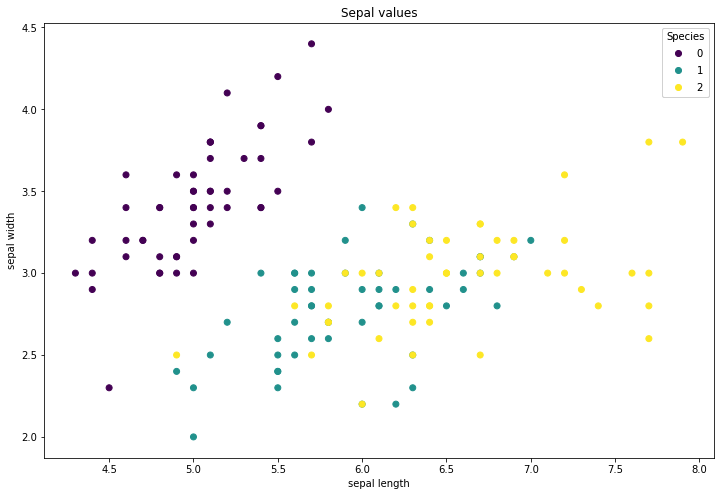

In [14]:
#Based on Sepal Values
plt.rcParams['figure.figsize'] = (12,8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['species'])

# Produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc = 'upper right', title = 'Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

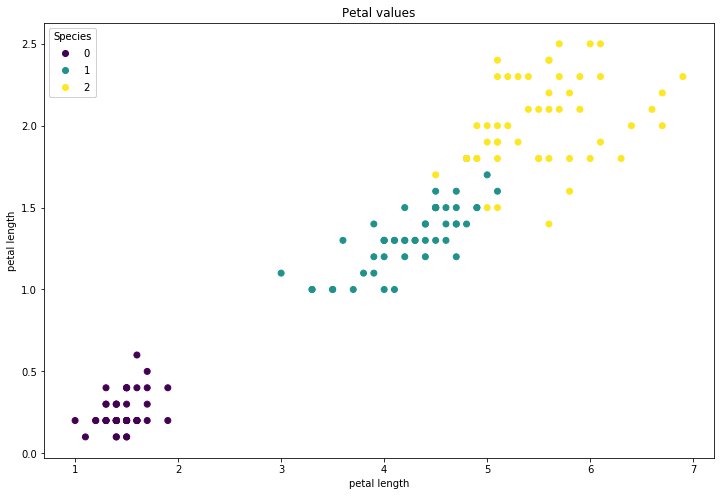

In [15]:
# Based on Petal Values
plt.rcParams['figure.figsize'] =(12,8)
fig, ax = plt.subplots()
scatter = ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['species'])

# Produce a legend with unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), loc= 'upper left', title = 'Species')
plt.xlabel('petal length')
plt.ylabel('petal length')
plt.title('Petal values', fontsize = 12)
ax.add_artist(legend)
plt.show()

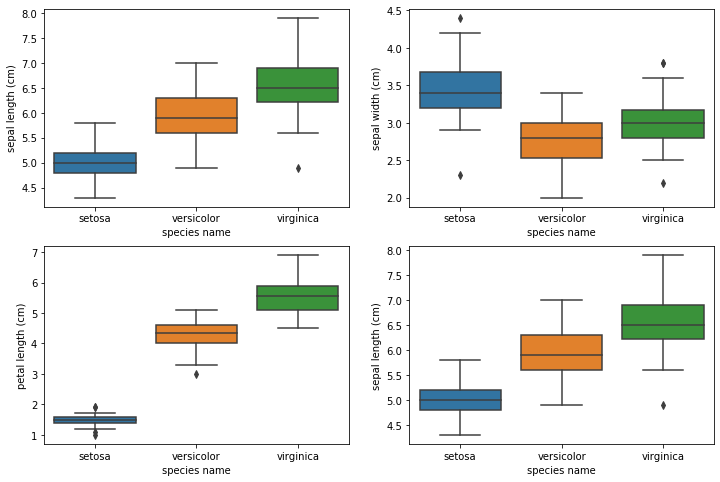

In [17]:
# To see all the values based on the species in boxplot
f, axes = plt.subplots(2,2)
sns.boxplot( y = 'sepal length (cm)', x = 'species name', data =df, ax = axes[0,0])
sns.boxplot( y = 'sepal width (cm)', x = 'species name', data =df, ax = axes[0,1])
sns.boxplot( y = 'petal length (cm)', x = 'species name', data =df, ax = axes[1,0])
sns.boxplot( y = 'sepal length (cm)', x = 'species name', data =df, ax = axes[1,1])
plt.show()

# Data Wrangling

In [18]:
# To see null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species name         0
dtype: int64

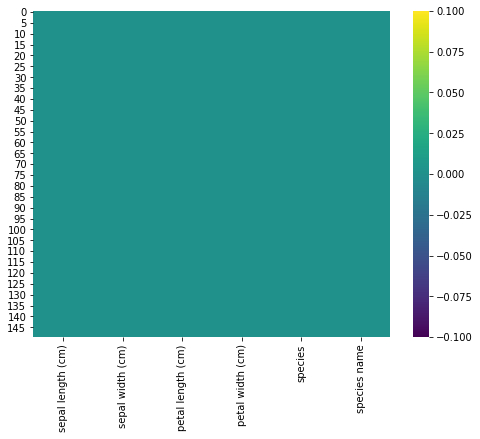

In [24]:
# To see visually
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cmap = 'viridis')

# Chosing the number of clusters

In [25]:
# Import library
from sklearn.cluster import KMeans

In [26]:
x = df.iloc[:, [0,1,2,3]].values

In [28]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    km = KMeans(n_clusters =i)
    km.fit(x)
    wcss.append(km.inertia_)

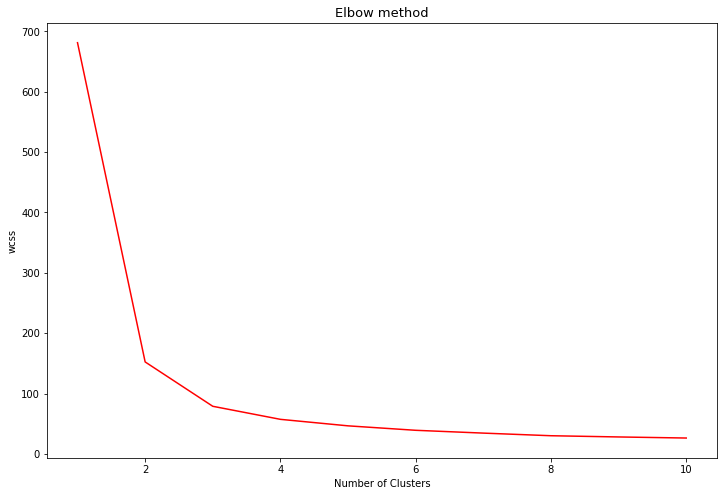

In [29]:
#Plot the wcss values(elbow method)
plt.plot(k_range, wcss, c = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow method', fontsize = 13)
plt.show()

# Implement K-Means Clustering

In [32]:
#Apply kmeans to data
km = KMeans(n_clusters =3)
pred = km.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [33]:
# To see cluster center
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

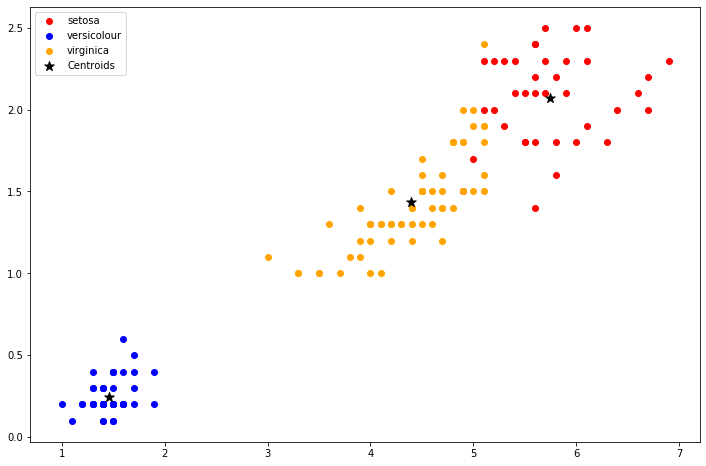

In [37]:
# Visualising the cluster - On the second two columns
plt.scatter(x[pred ==0,2], x[pred ==0,3], c = 'red', label = 'setosa')
plt.scatter(x[pred ==1,2], x[pred ==1,3], c = 'blue', label = 'versicolour')
plt.scatter(x[pred ==2,2], x[pred ==2,3], c = 'orange', label = 'virginica')

##Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], s = 100, c = 'black', marker='*', label ='Centroids')
plt.legend()
plt.show()

# Thank You